# 📊 Tipos de Errores en Modelos de Regresión

En problemas de regresión, es fundamental medir **qué tan lejos están las predicciones del modelo respecto a los valores reales**. Para ello, se utilizan distintas **métricas de error**, cada una con sus características, ventajas y casos de uso.

---

## 📐 1. Error Absoluto Medio (MAE - Mean Absolute Error)

### 🔎 Definición
Promedio de los valores absolutos de los errores entre las predicciones y los valores reales.

\[
MAE = \\frac{1}{n} \\sum_{i=1}^{n} |y_i - \\hat{y}_i|
\]

### ✅ ¿Cuándo usarlo?
- Cuando quieres una medida **robusta ante valores atípicos**.
- Fácil de interpretar: representa el error promedio en las **mismas unidades que la variable objetivo**.

### 📌 Ejemplo de uso
Predicción del precio de una casa: si el MAE es 3,000, en promedio el modelo se equivoca por $3,000.

---

## 📐 2. Error Cuadrático Medio (MSE - Mean Squared Error)

### 🔎 Definición
Promedio de los cuadrados de los errores entre las predicciones y los valores reales.

\[
MSE = \\frac{1}{n} \\sum_{i=1}^{n} (y_i - \\hat{y}_i)^2
\]

### ✅ ¿Cuándo usarlo?
- Cuando quieres penalizar más fuertemente los **errores grandes**.
- Útil para modelos donde los errores grandes son muy costosos.

### ⚠️ Consideraciones
- No es tan interpretable directamente porque está en **unidades al cuadrado**.

---

## 📐 3. Raíz del Error Cuadrático Medio (RMSE - Root Mean Squared Error)

### 🔎 Definición
Es la raíz cuadrada del MSE.

\[
RMSE = \\sqrt{\\frac{1}{n} \\sum_{i=1}^{n} (y_i - \\hat{y}_i)^2}
\]

### ✅ ¿Cuándo usarlo?
- Cuando quieres penalizar errores grandes (como MSE), pero **con unidades originales**.
- Muy común en competiciones de regresión (Kaggle, papers).

### 📌 Ejemplo de uso
Si RMSE = 5.2 en predicción de consumo energético (kWh), en promedio el modelo se equivoca por 5.2 kWh, con mayor castigo a errores grandes.

---

## 📐 4. Coeficiente de Determinación (R² Score)

### 🔎 Definición
Mide la proporción de la varianza explicada por el modelo.

\[
R^2 = 1 - \\frac{\\sum (y_i - \\hat{y}_i)^2}{\\sum (y_i - \\bar{y})^2}
\]

Donde:
- \( \\hat{y}_i \): predicción
- \( y_i \): valor real
- \( \\bar{y} \): media de los valores reales

### ✅ ¿Cuándo usarlo?
- Para comparar modelos entre sí.
- Para entender qué **porcentaje de la variabilidad** en los datos está siendo capturada por el modelo.

### 🧠 Interpretación
- R² = 1 → predicciones perfectas
- R² = 0 → el modelo no mejora respecto a simplemente predecir el promedio
- R² < 0 → el modelo es **peor** que predecir siempre la media

---

## 📊 Comparación Resumida

| Métrica | Penaliza más errores grandes | Fácil de interpretar | Sensible a outliers | Unidades |
|--------|-------------------------------|----------------------|---------------------|----------|
| MAE    | No                            | Sí                   | No                  | Original |
| MSE    | Sí                            | No                   | Sí                  | Cuadradas |
| RMSE   | Sí                            | Sí                   | Sí                  | Original |
| R²     | No (es una proporción)        | Sí                   | Sí                  | Sin unidades |

---

## 🛠️ Ejemplo en Python

```python
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(\"MAE:\", mae)
print(\"MSE:\", mse)
print(\"RMSE:\", rmse)
print(\"R²:\", r2)


# Diccionario de Datos - Dataset de Diabetes (Scikit-learn)

Este dataset proviene del Hospital Universitario de Ginebra y contiene mediciones clínicas de pacientes con diabetes, con el objetivo de predecir la progresión de la enfermedad (una variable continua).

## Variable Objetivo

- **`target`**: Progresión de la enfermedad un año después de la medición (valor numérico continuo)

---

## Variables Predictoras (Features)

> Nota: Todas las variables han sido **normalizadas** a media 0 y varianza 1, por lo que no están en sus unidades originales.

- `age` – Edad del paciente
- `sex` – Sexo del paciente (codificado)
- `bmi` – Índice de masa corporal (relación peso/altura²)
- `bp` – Presión arterial promedio
- `s1` – Nivel sérico del colesterol total
- `s2` – Nivel sérico de lipoproteínas de alta densidad (HDL)
- `s3` – Nivel sérico de lipoproteínas de baja densidad (LDL)
- `s4` – Nivel sérico de triglicéridos
- `s5` – Nivel sérico de hemoglobina glicosilada (HbA1c)
- `s6` – Nivel sérico de glucosa en ayunas

---

## Total de columnas

- 10 columnas de entrada (features)
- 1 columna objetivo (`target`)

---

## Observaciones

- Todas las variables son numéricas y están normalizadas.
- El objetivo es una predicción **de regresión** (no clasificación).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# 1. Cargar dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")



In [3]:
# 2. División 80/20 para evaluación final
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [4]:
# 3. Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [5]:
# 4. Modelos a evaluar
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42)
}



In [6]:
# 5. K-Fold Cross Validation con RMSE negativo
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train,
                              cv=kfold, scoring='neg_root_mean_squared_error')
    rmse_scores[name] = -scores  # Convertimos a positivo
    print(f"{name} - RMSE por fold:", -scores)
    print(f"{name} - Promedio de RMSE:", -scores.mean())



Linear Regression - RMSE por fold: [53.37368921 56.76099886 53.04311786 54.46003651 59.33532419]
Linear Regression - Promedio de RMSE: 55.39463332801855
Ridge Regression - RMSE por fold: [53.38110889 56.68571406 52.94154091 54.51512495 59.35273201]
Ridge Regression - Promedio de RMSE: 55.375244163627805
Random Forest - RMSE por fold: [56.33953816 62.09080904 59.31203932 58.32680145 61.07751707]
Random Forest - Promedio de RMSE: 59.429341009266864


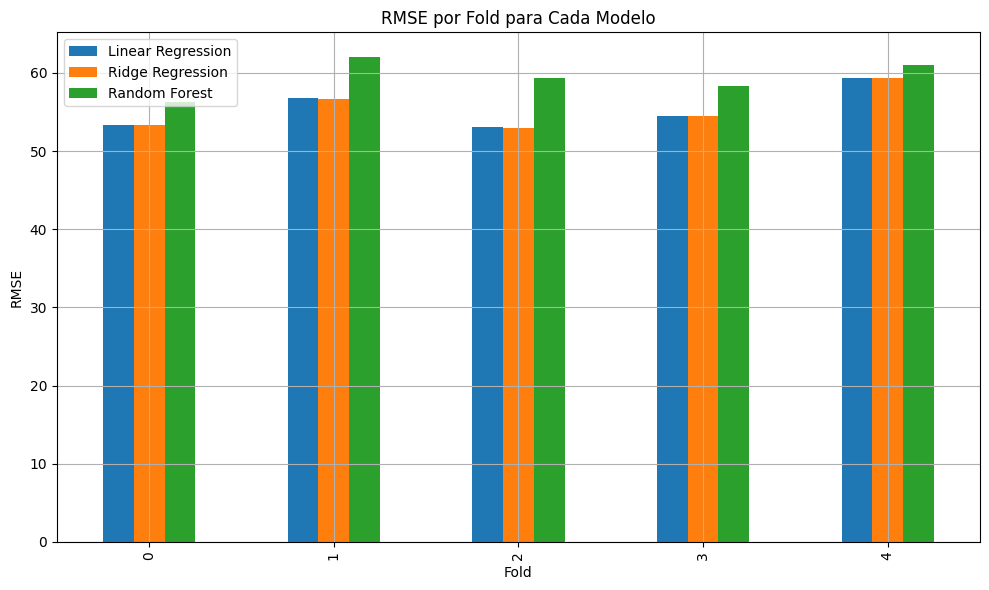

In [7]:
# 6. Gráfica de barras
rmse_df = pd.DataFrame(rmse_scores)
rmse_df.plot(kind='bar', figsize=(10,6))
plt.title("RMSE por Fold para Cada Modelo")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# 7. Entrenamiento final y evaluación en test
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_train_scaled, y_train)
y_pred = final_model.predict(X_test_scaled)



In [11]:
# 8. Evaluación final
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación en test set (Random Forest):")
print("RMSE:", rmse)
print("R2 Score:", r2)



Evaluación en test set (Random Forest):
RMSE: 2959.180561797753
R2 Score: 0.44146927036843053


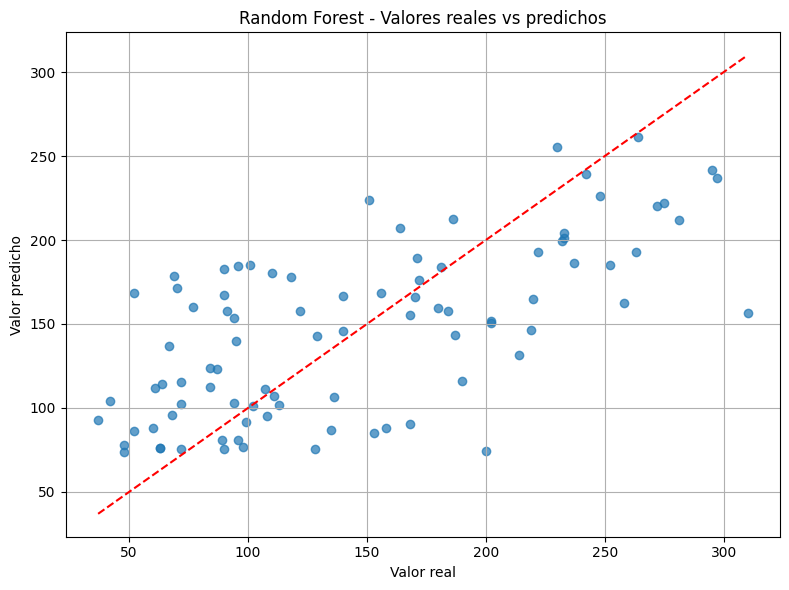

In [12]:
# 9. Gráfico de comparación real vs predicho
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title("Random Forest - Valores reales vs predichos")
plt.grid(True)
plt.tight_layout()
plt.show()
